<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

## Contents
- [Exploratory Data Analysis](#Part-3:-Exploratory-Data-Analysis)
- [Tokenizing](#Tokenizing)

--- 
# Part 4 : EDA

--- 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
from datetime import datetime
import time
import sys
import string
import re
from bs4 import BeautifulSoup
from sklearn.feature_extraction import text
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
# Read in CSV & create df

df = pd.read_csv('./data/cleaned_subreddit_data.csv')

In [5]:
df.head()

,author,num_comments,score,selftext,subreddit,title,timestamp,all_text
0,Erahth,12,1,"So, this just happened. My 3.5yo son is showin...",MaliciousCompliance,One more sip…,2021-08-01 00:11:01,"One more sip… So, this just happened. My 3.5yo..."
1,MorrisonsLament,39,1,Many years ago I was working for a fairly larg...,MaliciousCompliance,"""You can't fire me. But you can make me stop w...",2021-08-01 00:12:45,"""You can't fire me. But you can make me stop w..."
2,infiniteknights,215,1,"I've been doing all my shopping online, from g...",MaliciousCompliance,"""Personal responsibility""? Ok!",2021-08-01 00:21:24,"""Personal responsibility""? Ok! I've been doing..."
3,SimRayB,19,1,"According to my Mother, this happened when I w...",MaliciousCompliance,You put all of those in your mouth or you can’...,2021-08-01 00:42:46,You put all of those in your mouth or you can’...
4,CSPhCT,28,1,Patient comes into my pharmacy. “I’m here for ...,MaliciousCompliance,Patient wants what he wants so I just need to ...,2021-08-01 06:01:07,Patient wants what he wants so I just need to ...


In [6]:
malicious = df[df['subreddit']=='MaliciousCompliance']
petty = df[df['subreddit']=='pettyrevenge']
pro = df[df['subreddit']=='ProRevenge']

### Most Common Words in all 3 Subreddits

In [7]:
# Vectorize
X = df['all_text']

In [8]:
# Baseline
df['subreddit'].value_counts(normalize=True)

MaliciousCompliance    0.473948
pettyrevenge           0.300295
ProRevenge             0.225757
Name: subreddit, dtype: float64

In [9]:
# Instantiate a CountVectorizer
cvec = CountVectorizer(max_features = 1000,
                      #min_df=2,
                      stop_words = 'english'
                      )

In [10]:
# Fit & transform the vectorizer
vec_df= pd.DataFrame(cvec.fit_transform(X).todense(), columns=cvec.get_feature_names())

In [ ]:
# Checking list of words to see if i need to do any more cleaning - commenting out for space
#cvec.get_feature_names()

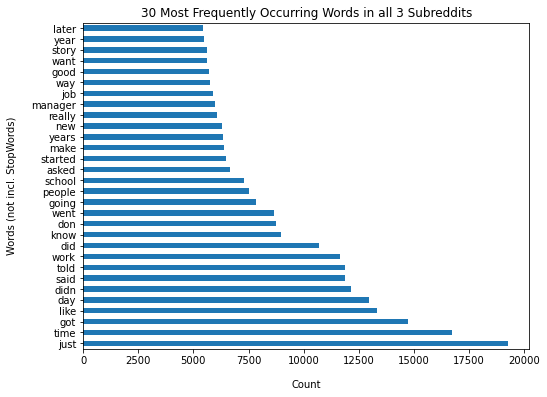

In [11]:
vec_df.sum().sort_values(ascending = False).head(30).plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Words (not incl. StopWords)", labelpad=14)
plt.title("30 Most Frequently Occurring Words in all 3 Subreddits");

### Most Common Words by Subreddit

In [12]:
# Vectorizing for each sub
X1 = malicious['all_text']
X2 = petty['all_text']
X3 = pro['all_text']

vec_mal= pd.DataFrame(cvec.fit_transform(X1).todense(), columns=cvec.get_feature_names())
vec_petty= pd.DataFrame(cvec.fit_transform(X2).todense(), columns=cvec.get_feature_names())
vec_pro= pd.DataFrame(cvec.fit_transform(X3).todense(), columns=cvec.get_feature_names())

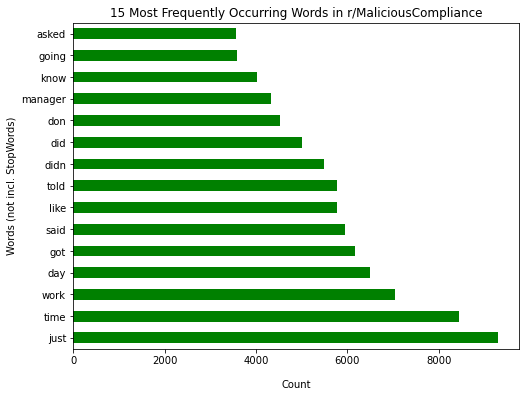

In [13]:
vec_mal.sum().sort_values(ascending = False).head(15).plot(kind='barh', figsize=(8, 6), color = 'green')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Words (not incl. StopWords)")
plt.title("15 Most Frequently Occurring Words in r/MaliciousCompliance");

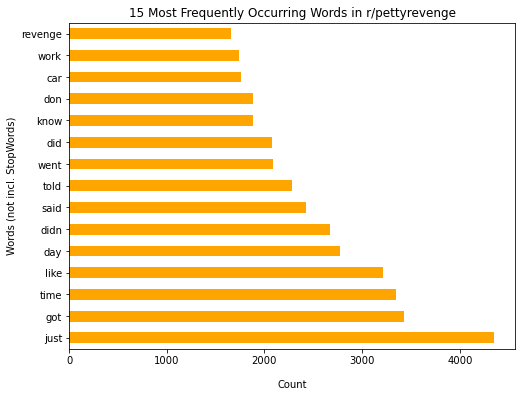

In [14]:
vec_petty.sum().sort_values(ascending = False).head(15).plot(kind='barh', figsize=(8, 6), color = 'orange')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Words (not incl. StopWords)")
plt.title("15 Most Frequently Occurring Words in r/pettyrevenge");

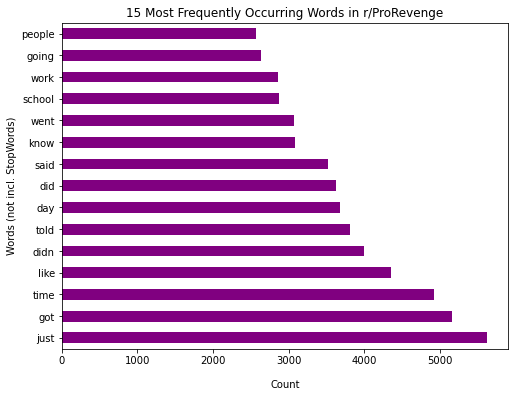

In [15]:
vec_pro.sum().sort_values(ascending = False).head(15).plot(kind='barh', figsize=(8, 6), color = 'purple')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Words (not incl. StopWords)")
plt.title("15 Most Frequently Occurring Words in r/ProRevenge");

### Removing Additional Stopwords
There's a lot of overlap in word frequency between the 3 subreddits
* 'just', 'time', 'like', 'did', 'didn', 'told', 'day', 'work', 'said'

In [ ]:
# Remove more stop words

my_stops = stopwords.words('english')
my_stops.extend(['none','\n', 'www', 'reddit', 'com', 'comment', 'http', '00', '000','10','100','11','12','15','16',
                 '18','20','25','30','40','45','50','op', 'just', 'time', 'like', 'did', 'didn', 'told', 'day', 
                 'know', 'said'])
my_stops = set(my_stops)


meaningful_words = [w for w in words if not w in my_stops]
    
# lemmatizer the words.
lemmatizer = WordNetLemmatizer()
tokens_lem = [lemmatizer.lemmatize(i) for i in meaningful_words]
    
# Join the words back into one string
' '.join(tokens_lem)

In [ ]:
def tokenize(column):
    raw[column] = [word_tokenize(str(text)) for text in word[column]]
    return raw[column]

def lemmatize(tokenized_column):
    lemmatizer = WordNetLemmatizer()
    raw[tokenized_column] = [' '.join([lemmatizer.lemmatize(word) for word in text]) for text in raw[tokenized_column]]
    return raw[tokenized_column]